# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [2]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')


## Task 1

Run the code below before you start working on your homework:


In [6]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [7]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [113]:
task2_data = pd.read_csv('../data/hw3-task2-data.csv')
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [114]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1],task2_data.iloc[:,2], train_size = 0.25, test_size = 0.75)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [115]:
model = KMeans(n_clusters = 2).fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [116]:
cm = confusion_matrix(Ytest, predictions)

import sklearn.metrics as mt 

accuracy = mt.accuracy_score(Ytest, predictions)
accuracy

0.5399719495091164

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

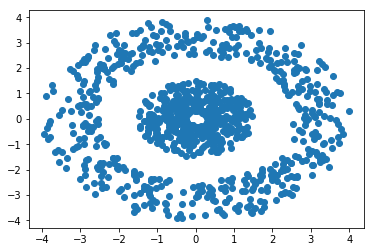

In [117]:
import matplotlib.pyplot as plt
plt.plot(task2_data.x, task2_data.y, 'o')

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

As mentioned in lecture, K means is an unsupervised clustering algorithm, we don't have specific idea about their labels; we just train our data and test it. This might be one of the reasons; moreover, k-means algorithm is trying to split data to individual clusters, and our in our dataset that it actually impossible. We can see that the cluster in the middle kinda looks like subset of the cluster around it, so our algorithm will not be able to do a proper splitting.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [118]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean').fit(Xtrain, Ytrain)

predictions =  model.predict(Xtest)

Now, construct the confusion matrix, and calculate your accuracy.

In [119]:
cm = confusion_matrix(Ytest, predictions)

import sklearn.metrics as mt 

accuracy = mt.accuracy_score(Ytest, predictions)
accuracy

0.8078541374474053

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

Since K-NN is supervised, we taught our algorithm to divide clusters more accurate. It can understand it from looking its closest neighbors

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [6]:
data = pd.read_excel('../data/BreastTissue.xlsx')
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]
xs

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [197]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75)

In [198]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)

import sklearn.metrics as mt 
accuracy = mt.accuracy_score(Ytest, predicted)


print(cm)
print(accuracy)

[[6 0 1 0 0 0]
 [0 1 0 2 0 0]
 [1 2 1 0 0 0]
 [0 0 0 1 2 1]
 [0 0 0 3 1 0]
 [0 0 0 1 3 1]]
0.4074074074074074


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [199]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs)

Now, repeat mdoel construction, training, testing and accuracy calculation

In [200]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75)
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
model.fit(Xtrain, Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest, predicted)

import sklearn.metrics as mt 
accuracy = mt.accuracy_score(Ytest, predicted)

print(cm)
print(accuracy)

[[3 0 1 0 0 0]
 [0 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 0 1 2]
 [0 0 0 0 3 1]
 [0 0 0 1 2 3]]
0.7037037037037037


Why did we get better results? Explain below:

### Your explanation goes below

We scaled our data points with unit variance instead of mean.

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.